In [12]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

In [2]:
# Leer archivo CSV
df_csv = pd.read_csv('alzheimers_disease_data.csv')
df_csv

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [10]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

## **<span style="color:#1a73e8;">PRUEBAS DE DOS GRUPOS</span>**

### **<span style="color:#1a73e8;">PRUEBA U MANN WHITNEY </span>**

In [4]:
def boxplot_by_group(df, quantitative_col, categorical_col):
    """
    Crea un boxplot por grupo usando Plotly.

    Parámetros:
    -----------
    df : pd.DataFrame
        DataFrame que contiene las variables.
    quantitative_col : str
        Nombre de la columna cuantitativa (numérica).
    categorical_col : str
        Nombre de la columna cualitativa (categórica).
    title : str
        Título del gráfico.

    Retorna:
    --------
    fig : plotly.graph_objects.Figure
        Objeto figura interactiva.
    """
    fig = px.box(
        df,
        x=categorical_col,
        y=quantitative_col,
        color=categorical_col,
        title='Boxplot por grupo',
        points="outliers",  # muestra los puntos outliers
        template="plotly_white"
    )

    fig.update_layout(
        xaxis_title=categorical_col,
        yaxis_title=quantitative_col,
        font=dict(size=14),
        title_font_size=16
    )

    fig.show()

In [5]:
boxplot_by_group(df_csv, 'PhysicalActivity', 'Diagnosis')

In [6]:
# 1. Agrupar los datos por diagnóstico
# 0 = Sin Alzheimer, 1 = Con Alzheimer
grupo_sin_alz = df_csv[df_csv['Diagnosis'] == 0]['PhysicalActivity'].dropna()
grupo_con_alz = df_csv[df_csv['Diagnosis'] == 1]['PhysicalActivity'].dropna()

# 2. Prueba de normalidad (Shapiro-Wilk)
print("\n--- Prueba de Normalidad: Shapiro-Wilk ---")
shapiro_sin = stats.shapiro(grupo_sin_alz)
shapiro_con = stats.shapiro(grupo_con_alz)

print(f"Sin Alzheimer: estadístico={shapiro_sin.statistic:.4f}, p-valor={shapiro_sin.pvalue:.4f}")
if shapiro_sin.pvalue > 0.05:
    print("→ No se rechaza H₀: los datos tienen distribución normal.")
else:
    print("→ Se rechaza H₀: los datos NO tienen distribución normal.")

print(f"Con Alzheimer: estadístico={shapiro_con.statistic:.4f}, p-valor={shapiro_con.pvalue:.4f}")
if shapiro_con.pvalue > 0.05:
    print("→ No se rechaza H₀: los datos tienen distribución normal.")
else:
    print("→ Se rechaza H₀: los datos NO tienen distribución normal.")

# 3. Prueba de homogeneidad de varianzas (Levene)
print("\n--- Prueba de Homogeneidad de Varianzas: Levene ---")
levene_test = stats.levene(grupo_sin_alz, grupo_con_alz)
print(f"Estadístico={levene_test.statistic:.4f}, p-valor={levene_test.pvalue:.4f}")
if levene_test.pvalue > 0.05:
    print("→ No se rechaza H₀: las varianzas son iguales (homocedasticidad).")
else:
    print("→ Se rechaza H₀: las varianzas son distintas (heterocedasticidad).")

# 4. Dado que no se cumple normalidad, se aplica prueba no paramétrica: Mann-Whitney U
print("\n--- Prueba de Mann–Whitney–Wilcoxon ---")
u_stat, p_val = stats.mannwhitneyu(grupo_sin_alz, grupo_con_alz, alternative='two-sided')
print(f"Estadístico U = {u_stat:.4f}, p-valor = {p_val:.4f}")
if p_val < 0.05:
    print("→ Se rechaza H₀: hay diferencia significativa entre los grupos.")
else:
    print("→ No se rechaza H₀: no hay diferencia significativa entre los grupos.")


--- Prueba de Normalidad: Shapiro-Wilk ---
Sin Alzheimer: estadístico=0.9551, p-valor=0.0000
→ Se rechaza H₀: los datos NO tienen distribución normal.
Con Alzheimer: estadístico=0.9590, p-valor=0.0000
→ Se rechaza H₀: los datos NO tienen distribución normal.

--- Prueba de Homogeneidad de Varianzas: Levene ---
Estadístico=0.4642, p-valor=0.4957
→ No se rechaza H₀: las varianzas son iguales (homocedasticidad).

--- Prueba de Mann–Whitney–Wilcoxon ---
Estadístico U = 524081.0000, p-valor = 0.7857
→ No se rechaza H₀: no hay diferencia significativa entre los grupos.


## **<span style="color:#1a73e8;">PRUEBAS DE TRES O MÁS GRUPOS</span>**

### **<span style="color:#1a73e8;">KRUSKAL - WALLIS</span>**


In [7]:
boxplot_by_group(df_csv, 'DietQuality', 'EducationLevel')

In [8]:
# 1. Agrupar por niveles de educación
grupo_1 = df_csv[df_csv['EducationLevel'] == 0]['DietQuality'].dropna()
grupo_2 = df_csv[df_csv['EducationLevel'] == 1]['DietQuality'].dropna()
grupo_3 = df_csv[df_csv['EducationLevel'] == 2]['DietQuality'].dropna()
grupo_4 = df_csv[df_csv['EducationLevel'] == 3]['DietQuality'].dropna()

# 2. 
modelo = ols('DietQuality ~ C(EducationLevel)', data=df_csv).fit()

# 3. Normalidad de los residuos
residuos = modelo.resid
shapiro_test = stats.shapiro(residuos)
print("\n--- Prueba de normalidad de los residuos (Shapiro-Wilk) ---")
print(f"Estadístico={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("→ Los residuos tienen distribución normal.")
else:
    print("→ Los residuos NO tienen distribución normal.")

# 4. Homogeneidad de varianzas
levene = stats.levene(grupo_1, grupo_2, grupo_3, grupo_4)
print("\n--- Prueba de homogeneidad de varianzas (Levene) ---")
print(f"Estadístico={levene.statistic:.4f}, p-valor={levene.pvalue:.4f}")
if levene.pvalue > 0.05:
    print("→ Varianzas homogéneas.")
else:
    print("→ Varianzas heterogéneas.")

# 5. Como los residuos NO son normales, aplicar prueba de Kruskal-Wallis
print("\n--- Prueba de Kruskal-Wallis ---")
kruskal = stats.kruskal(grupo_1, grupo_2, grupo_3, grupo_4)
print(f"Estadístico H = {kruskal.statistic:.4f}, p-valor = {kruskal.pvalue:.4f}")
if kruskal.pvalue < 0.05:
    print("→ Se rechaza H₀: hay diferencias significativas entre los niveles de educación.")
else:
    print("→ No se rechaza H₀: no hay diferencias significativas entre los niveles de educación.")


--- Prueba de normalidad de los residuos (Shapiro-Wilk) ---
Estadístico=0.9537, p-valor=0.0000
→ Los residuos NO tienen distribución normal.

--- Prueba de homogeneidad de varianzas (Levene) ---
Estadístico=0.6423, p-valor=0.5878
→ Varianzas homogéneas.

--- Prueba de Kruskal-Wallis ---
Estadístico H = 7.7800, p-valor = 0.0508
→ No se rechaza H₀: no hay diferencias significativas entre los niveles de educación.


## **<span style="color:#1a73e8;">PRUEBA CHI-CUADRADO</span>**

In [11]:
# ======================================================
# 1️⃣ PRUEBA DE BONDAD DE AJUSTE (Chi-cuadrado goodness-of-fit)
# ======================================================
# Objetivo: verificar si las frecuencias observadas de 'Diagnosis'
# siguen una distribución uniforme (todas las categorías igual probables)
# o una distribución esperada.

# Contar las frecuencias observadas
observadas = df_csv["Diagnosis"].value_counts().sort_index()
print("Frecuencias observadas:\n", observadas)

# Crear las frecuencias esperadas (mismo número en todas las categorías)
n = observadas.sum()
k = len(observadas)
esperadas = [n / k] * k

# Calcular estadístico chi-cuadrado y p-valor
chi2_stat, p_valor = stats.chisquare(f_obs=observadas, f_exp=esperadas)
print("\n--- Prueba Chi-cuadrado de bondad de ajuste ---")
print(f"Estadístico χ² = {chi2_stat:.3f},  p-valor = {p_valor:.4f}")

# Interpretación
if p_valor < 0.05:
    print("→ Se RECHAZA la hipótesis nula: la distribución NO es uniforme.")
else:
    print("→ No se rechaza la hipótesis nula: la distribución podría ser uniforme.")

# Hipótesis:
# H₀: Las frecuencias observadas siguen la distribución esperada.
# H₁: Las frecuencias observadas NO siguen la distribución esperada.


# ======================================================
# 2️⃣ PRUEBA DE INDEPENDENCIA (Chi-cuadrado de independencia)
# ======================================================
# Objetivo: comprobar si 'Diagnosis' y 'AntecedentesFamiliares' son independientes.

# Crear una tabla de contingencia
tabla = pd.crosstab(df_csv["Diagnosis"], df_csv["FamilyHistoryAlzheimers"])
print("\nTabla de contingencia:\n", tabla)

# Aplicar prueba chi-cuadrado
chi2, p, dof, esperadas = stats.chi2_contingency(tabla)

print("\n--- Prueba Chi-cuadrado de independencia ---")
print(f"Estadístico χ² = {chi2:.3f},  gl = {dof},  p-valor = {p:.4f}")

# Interpretación
if p < 0.05:
    print("→ Se RECHAZA H₀: existe relación entre Diagnosis y AntecedentesFamiliares.")
else:
    print("→ No se rechaza H₀: no hay evidencia de relación entre las variables.")

# Hipótesis:
# H₀: 'Diagnosis' y 'AntecedentesFamiliares' son independientes.
# H₁: Existe una relación entre ambas variables.

Frecuencias observadas:
 Diagnosis
0    1389
1     760
Name: count, dtype: int64

--- Prueba Chi-cuadrado de bondad de ajuste ---
Estadístico χ² = 184.105,  p-valor = 0.0000
→ Se RECHAZA la hipótesis nula: la distribución NO es uniforme.

Tabla de contingencia:
 FamilyHistoryAlzheimers     0    1
Diagnosis                         
0                        1024  365
1                         583  177

--- Prueba Chi-cuadrado de independencia ---
Estadístico χ² = 2.170,  gl = 1,  p-valor = 0.1407
→ No se rechaza H₀: no hay evidencia de relación entre las variables.


## **<span style="color:#1a73e8;">CORRELACIÓN</span>**

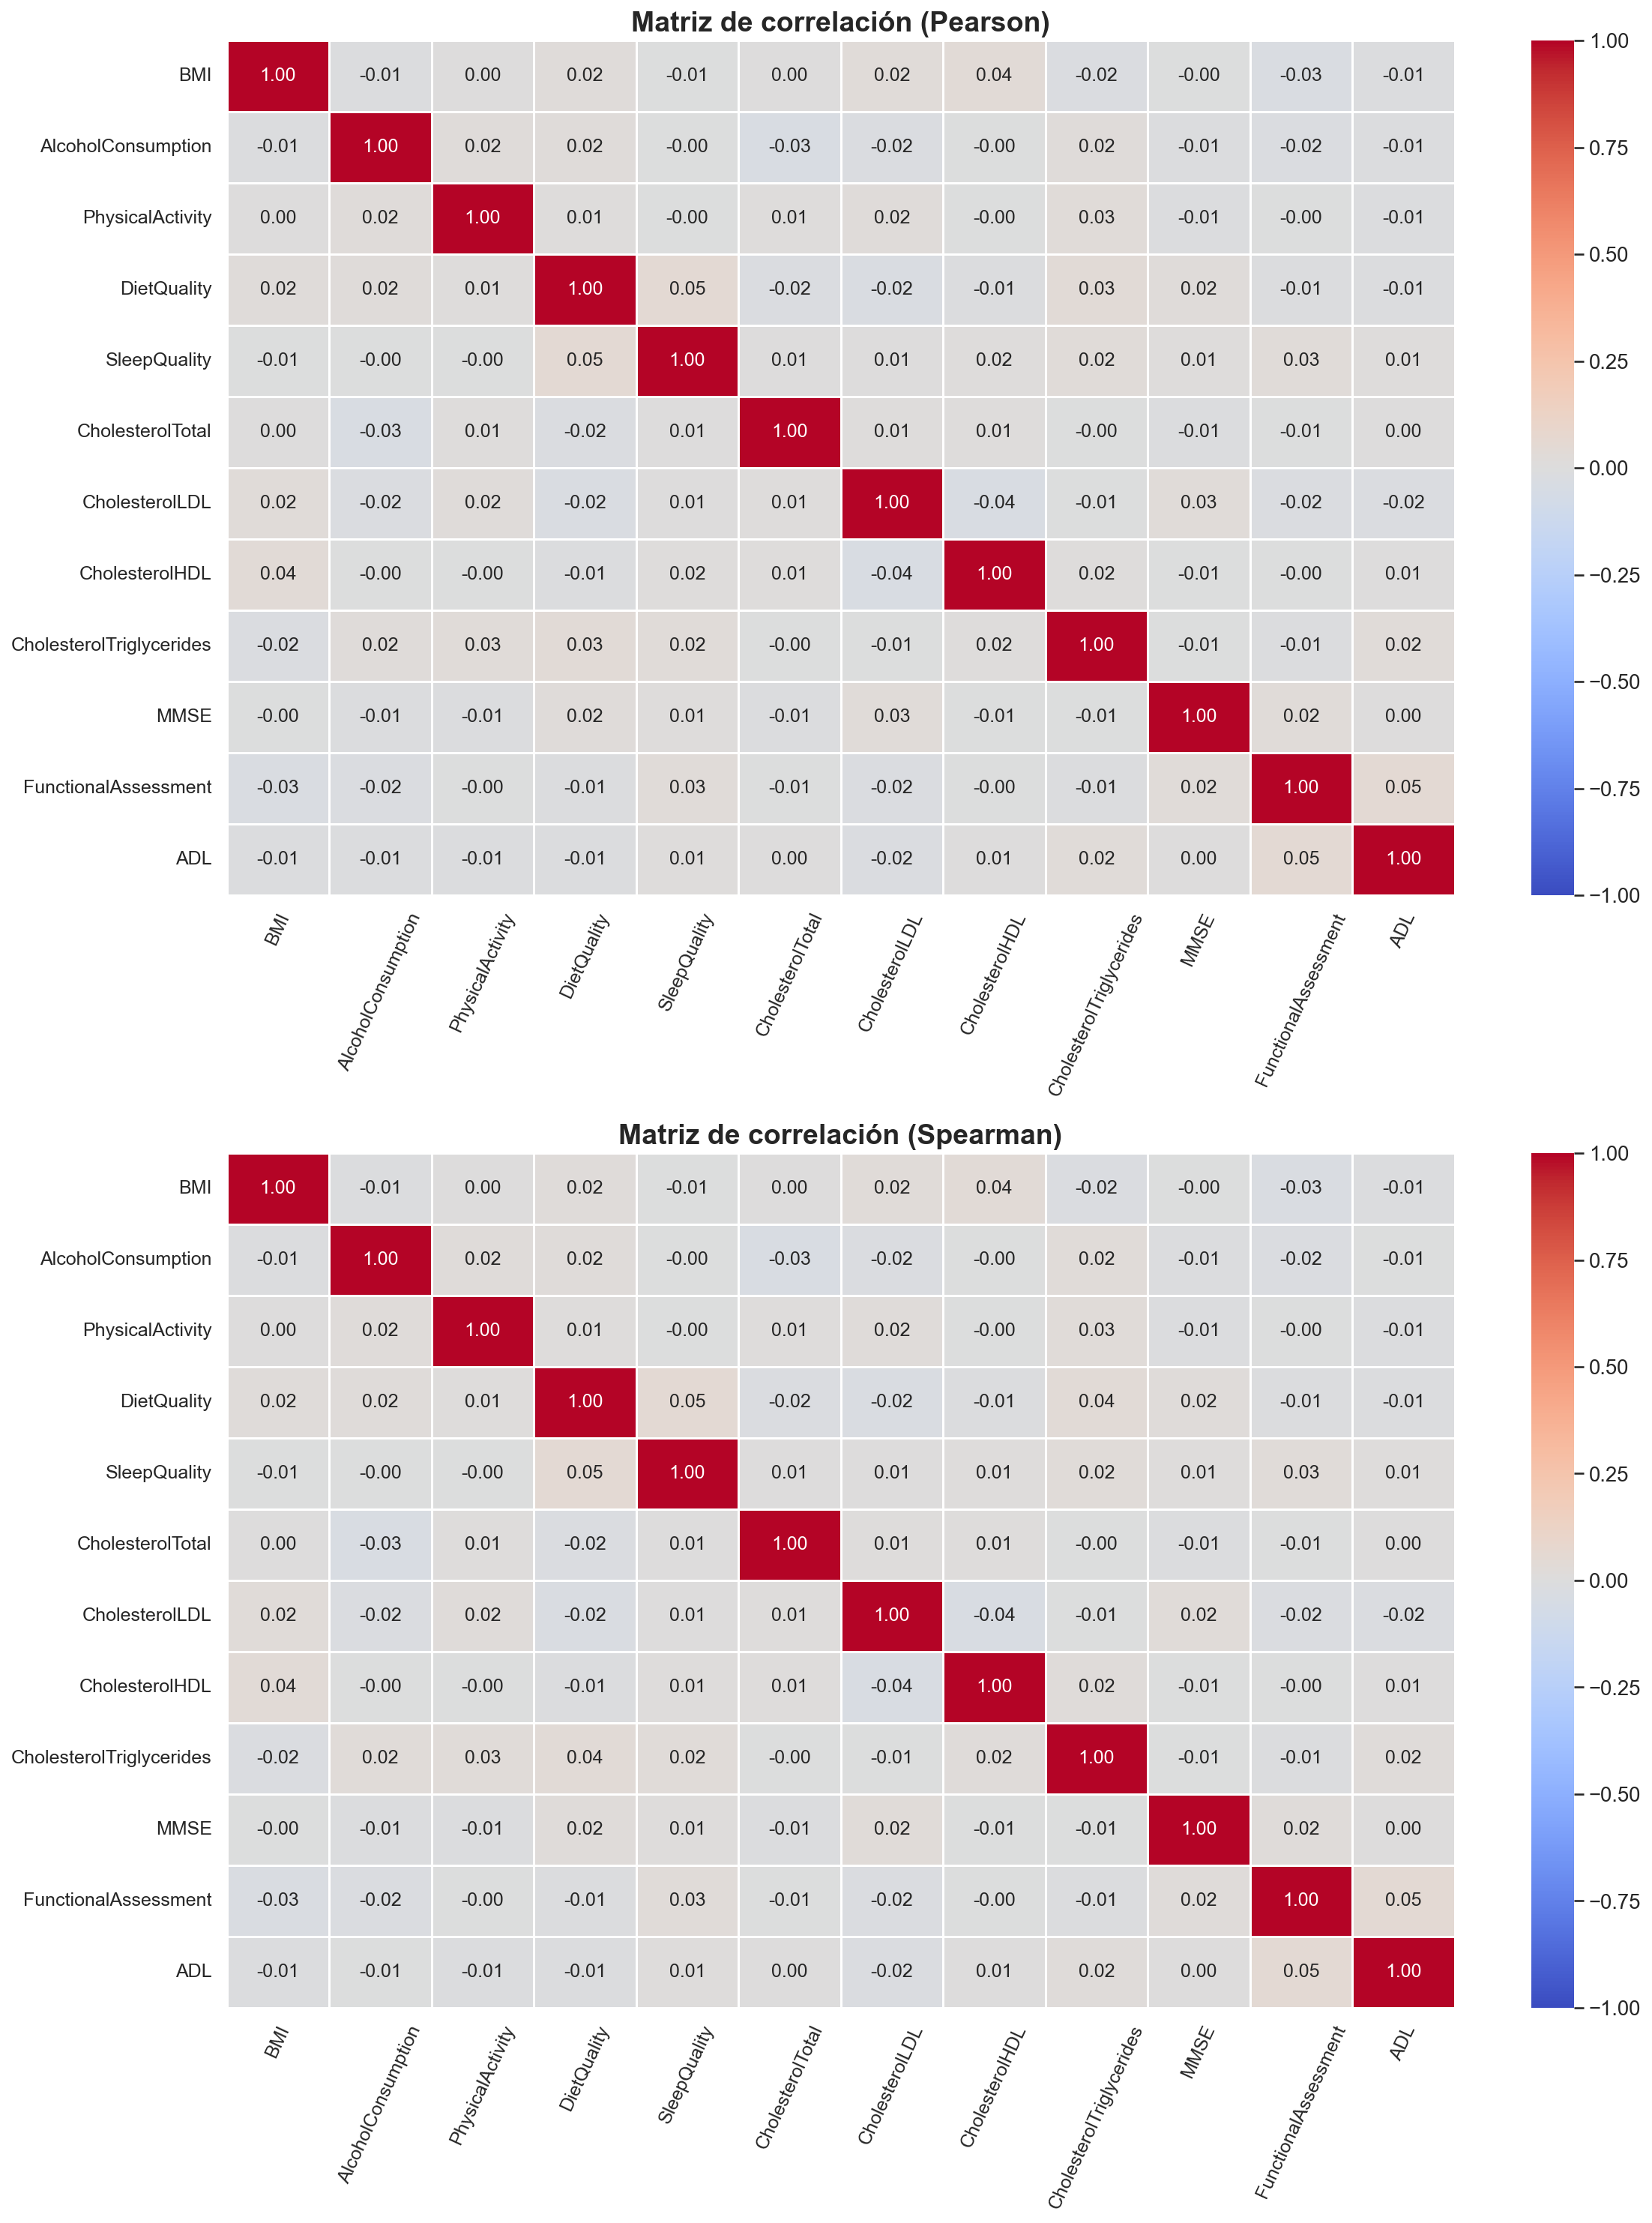

🔹 Correlaciones Pearson > 0.5:


,Variable 1,Variable 2,Correlación



🔹 Correlaciones Spearman > 0.5:


,Variable 1,Variable 2,Correlación


In [14]:
# --- Seleccionar columnas numéricas ---
df_num = df_csv.select_dtypes(include=['float64'])

# --- Calcular matrices de correlación ---
corr_pearson = df_num.corr(method='pearson')
corr_spearman = df_num.corr(method='spearman')

# --- Función para extraer correlaciones > 0.5 ---
def high_correlations(corr_matrix, threshold=0.5):
    corr_pairs = (
        corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        .stack()
        .reset_index()
    )
    corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']
    return corr_pairs[abs(corr_pairs['Correlación']) > threshold].sort_values(
        by='Correlación', ascending=False
    )

# --- Filtrar correlaciones altas ---
high_corr_pearson = high_correlations(corr_pearson)
high_corr_spearman = high_correlations(corr_spearman)

# --- Configuración estética general ---
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['figure.dpi'] = 150

# --- Figura con dos subgráficos (una columna) ---
fig, axes = plt.subplots(2, 1, figsize=(16, 20))

# --- Mapa de calor Pearson ---
sns.heatmap(
    corr_pearson, annot=True, fmt=".2f", cmap="coolwarm",
    cbar=True, square=False, linewidths=0.5,
    ax=axes[0], vmin=-1, vmax=1,
    annot_kws={"size": 12}
)
axes[0].set_title("Matriz de correlación (Pearson)", fontsize=18, fontweight="bold")
axes[0].tick_params(axis='x', rotation=65, labelsize=12)
axes[0].tick_params(axis='y', rotation=0, labelsize=12)

# --- Mapa de calor Spearman ---
sns.heatmap(
    corr_spearman, annot=True, fmt=".2f", cmap="coolwarm",
    cbar=True, square=False, linewidths=0.5,
    ax=axes[1], vmin=-1, vmax=1,
    annot_kws={"size": 12}
)
axes[1].set_title("Matriz de correlación (Spearman)", fontsize=18, fontweight="bold")
axes[1].tick_params(axis='x', rotation=65, labelsize=12)
axes[1].tick_params(axis='y', rotation=0, labelsize=12)

plt.tight_layout()
plt.show()

# --- Mostrar correlaciones altas ---
print("🔹 Correlaciones Pearson > 0.5:")
display(high_corr_pearson)

print("\n🔹 Correlaciones Spearman > 0.5:")
display(high_corr_spearman)